In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#names = ["id","age","smoker","alive","dead"]
data = pd.read_csv("./smoking.data",delim_whitespace=True)

In [13]:
data

,id,age,smoker,alive,dead
0,1,18-24,1,53,2
1,2,18-24,0,61,1
2,3,25-34,1,121,3
3,4,25-34,0,152,5
4,5,35-44,1,95,14
5,6,35-44,0,114,7
6,7,45-54,1,103,27
7,8,45-54,0,66,12
8,9,55-64,1,64,51
9,10,55-64,0,81,40


In [14]:
data.pivot_table(index="smoker",values=["alive",'dead'],aggfunc=np.sum,margins=True)

,alive,dead
smoker,,
0,502.0,230.0
1,443.0,139.0
All,945.0,369.0


In [15]:
from __future__ import division
data['prop_alive'] = 100*data["alive"]/(data["alive"]+data["dead"])
data['prop_dead'] = 100*data["dead"]/(data["alive"]+data["dead"])

In [16]:
import random
#f,axes = plt.subplots(2,2,sharex=True,sharey=True)

x1 = [random.randint(12,40) for _ in range(40)]
e1 = [np.random.normal(0,6) for _ in range(40)]
y1 = [82-.15*x1[i]+e1[i] for i in range(40)]
age1 = ["15-34" for _ in range(40)]
#axes[0,0].scatter(x1,y1)


x2 = [random.randint(5,30) for _ in range(40)]
e2 = [np.random.normal(0,5) for _ in range(40)]
y2 = [75-.3*x2[i]+e2[i] for i in range(40)]
age2 = ["35-54" for _ in range(40)]
#axes[0,1].scatter(x2,y2)
#plt.show()

x3 = [random.randint(0,30) for _ in range(40)]
e3 = [np.random.normal(0,4) for _ in range(40)]
y3 = [68-.45*x3[i]+e3[i] for i in range(40)]
age3 = ["55+" for _ in range(40)]
#axes[1,0].scatter(x3,y3)
#plt.show()

x4 = x1 + x2 + x3
y4 = y1 + y2 + y3
age4 = age1 + age2 + age3
#axes[1,1].scatter(x4,y4,color="g")
#plt.show()

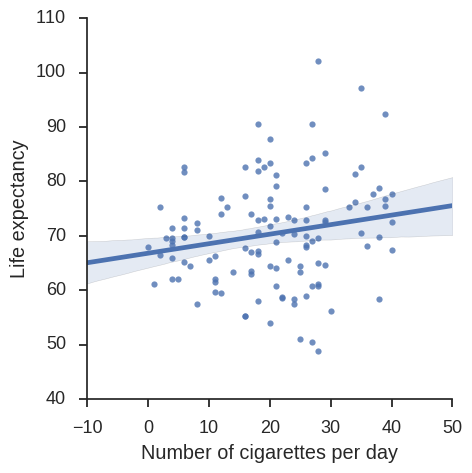

In [17]:
x=x4
y=y4
age=age4
sns.set(style="ticks", context="talk")
data = {"x":x,"y":y,"age":age}
df = pd.DataFrame(data)
g = sns.lmplot(x="x",y="y",data=df)
g.set_axis_labels("Number of cigarettes per day", "Life expectancy")
plt.show()

In [18]:
import statsmodels.api as sm
x_fit = sm.add_constant(x) # Without it intercept is excluded
model = sm.OLS(y, x_fit).fit()
predictions = model.predict(x_fit)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.478
Date:                Wed, 26 Oct 2016   Prob (F-statistic):             0.0364
Time:                        16:15:41   Log-Likelihood:                -439.64
No. Observations:                 120   AIC:                             883.3
Df Residuals:                     118   BIC:                             888.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         66.8047      1.895     35.248      0.0

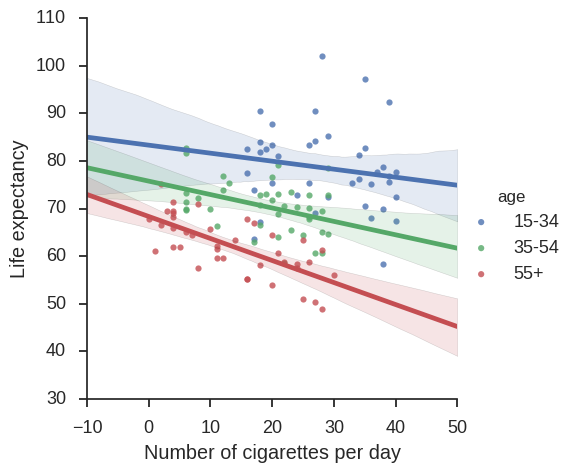

In [19]:
f = sns.lmplot(x="x",y="y",hue="age",data=df)
f.set_axis_labels("Number of cigarettes per day", "Life expectancy")
plt.show()

In [114]:
import random
#f,axes = plt.subplots(2,2,sharex=True,sharey=True)

xm = [random.randint(18,40) for _ in range(40)]
em = [np.random.normal(0,10)+5 for _ in range(40)]
ym = [5-.5*xm[i]+em[i] for i in range(40)]
sexm = ["Male" for _ in range(40)]
#axes[0,0].scatter(x1,y1)


xf = [random.randint(0,22) for _ in range(40)]
ef = [np.random.normal(0,5) for _ in range(40)]
yf = [-5-.75*xf[i]+ef[i] for i in range(40)]
sexf = ["Female" for _ in range(40)]
#axes[0,1].scatter(x2,y2)
#plt.show()

xt = xm + xf 
yt = ym + yf 
sext = sexm + sexf

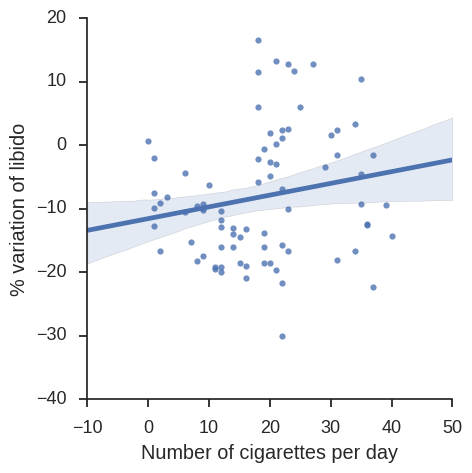

In [118]:
import seaborn as sns
x=xt
y=yt
sex=sext
sns.set(style="ticks", context="talk")
data = {"x":xt,"y":yt,"sex":sext}
df = pd.DataFrame(data)
g = sns.lmplot(x="x",y="y",data=df)
g.set_axis_labels("Number of cigarettes per day", "% variation of libido")
plt.show()

In [116]:
import statsmodels.api as sm
x_fit = sm.add_constant(x) # Without it intercept is excluded
model = sm.OLS(y, x_fit).fit()
predictions = model.predict(x_fit)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.941
Date:                Wed, 26 Oct 2016   Prob (F-statistic):             0.0903
Time:                        17:07:58   Log-Likelihood:                -296.02
No. Observations:                  80   AIC:                             596.0
Df Residuals:                      78   BIC:                             600.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -11.5660      2.290     -5.050      0.0

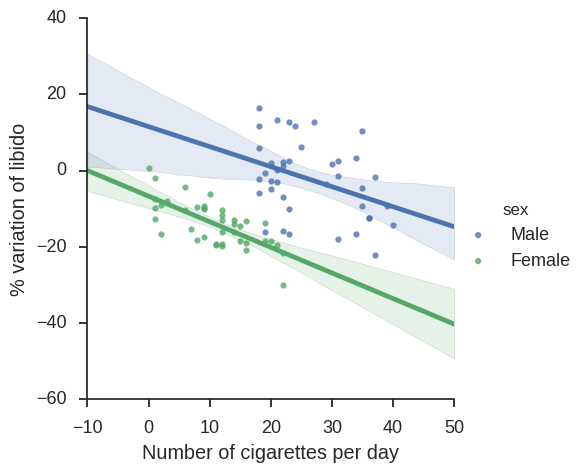

In [119]:
f = sns.lmplot(x="x",y="y",hue="sex",data=df)
f.set_axis_labels("Number of cigarettes per day", "% variation of libido")
plt.show()